## import libraries

In [91]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

## import data from csv file 

In [2]:
df  = pd.read_csv('../data/countries.csv')

In [3]:
df

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


## check type and shape of data


In [7]:
type(df),df.shape

(pandas.core.frame.DataFrame, (1704, 3))

## information data 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 3 columns):
country       1704 non-null object
year          1704 non-null int64
population    1704 non-null int64
dtypes: int64(2), object(1)
memory usage: 40.1+ KB


In [8]:
df.describe()

,year,population
count,1704.00000,1.704000e+03
mean,1979.50000,2.960121e+07
std,17.26533,1.061579e+08
min,1952.00000,6.001100e+04
25%,1965.75000,2.793664e+06
50%,1979.50000,7.023596e+06
75%,1993.25000,1.958522e+07
max,2007.00000,1.318683e+09


In [9]:
df.mean()

year          1.979500e+03
population    2.960121e+07
dtype: float64

## select particular data 

In [22]:
df_52 = df.loc[df['year'] == 1952]

In [24]:
df_52.head()

,country,year,population
0,Afghanistan,1952,8425333
12,Albania,1952,1282697
24,Algeria,1952,9279525
36,Angola,1952,4232095
48,Argentina,1952,17876956


In [29]:
df_07 = df.loc[df['year'] == 2007]

df_07

,country,year,population
11,Afghanistan,2007,31889923
23,Albania,2007,3600523
35,Algeria,2007,33333216
47,Angola,2007,12420476
59,Argentina,2007,40301927
...,...,...,...
1655,Vietnam,2007,85262356
1667,West Bank and Gaza,2007,4018332
1679,"Yemen, Rep.",2007,22211743
1691,Zambia,2007,11746035


In [33]:
type(df_52) , df_52.shape , type(df_07) ,df_07.shape

(pandas.core.frame.DataFrame, (142, 3), pandas.core.frame.DataFrame, (142, 3))

## marge Data 

In [34]:
pop_grouth = df_52.merge(df_07,left_on= 'country',right_on= 'country')

## Rename column name and drop year x and y

In [44]:
pop_grouth.rename(columns= {'population_x':'population_52','population_y':'population_07'},inplace=True)

In [40]:
pop_grouth = pop_grouth.drop(['year_x','year_y'],axis=1)

In [45]:
pop_grouth.head()

,country,population_52,population_07
0,Afghanistan,8425333,31889923
1,Albania,1282697,3600523
2,Algeria,9279525,33333216
3,Angola,4232095,12420476
4,Argentina,17876956,40301927


## adding new column is population grouth

In [48]:
pop_grouth['population_growth'] = pop_grouth['population_07'] - pop_grouth['population_52'] 

In [49]:
pop_grouth

,country,population_52,population_07,population_growth
0,Afghanistan,8425333,31889923,23464590
1,Albania,1282697,3600523,2317826
2,Algeria,9279525,33333216,24053691
3,Angola,4232095,12420476,8188381
4,Argentina,17876956,40301927,22424971
...,...,...,...,...
137,Vietnam,26246839,85262356,59015517
138,West Bank and Gaza,1030585,4018332,2987747
139,"Yemen, Rep.",4963829,22211743,17247914
140,Zambia,2672000,11746035,9074035


## sorting values 

In [51]:
pop_grouth = pop_grouth.sort_values('population_growth',ascending=False)

## reindex and delete previuos index 

In [62]:
pop_grouth  = pop_grouth.reset_index()

In [65]:
pop_grouth  = pop_grouth.drop(['index'],axis=1)

In [68]:
pop_grouth.head(11)

,country,population_52,population_07,population_growth
0,China,556263527,1318683096,762419569
1,India,372000000,1110396331,738396331
2,United States,157553000,301139947,143586947
3,Indonesia,82052000,223547000,141495000
4,Brazil,56602560,190010647,133408087
5,Pakistan,41346560,169270617,127924057
6,Bangladesh,46886859,150448339,103561480
7,Nigeria,33119096,135031164,101912068
8,Mexico,30144317,108700891,78556574
9,Philippines,22438691,91077287,68638596


10
142


ValueError: shape mismatch: objects cannot be broadcast to a single shape

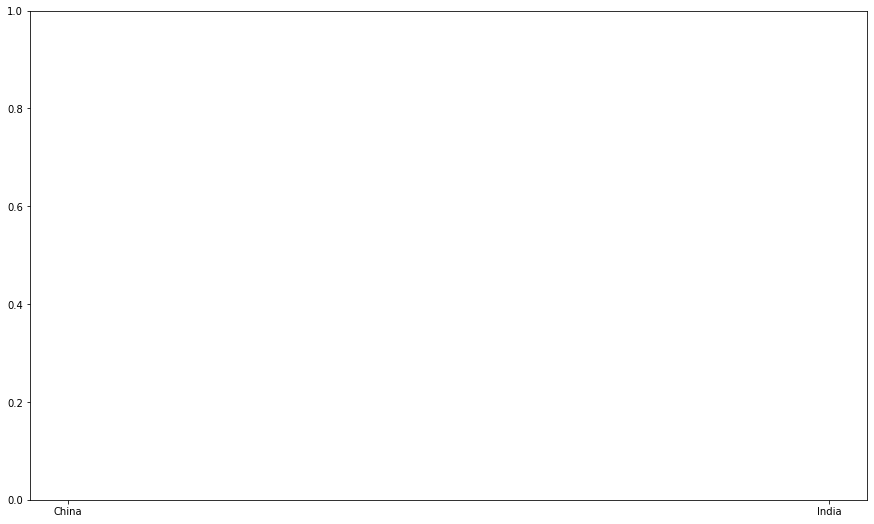

In [92]:
top_countries_names = ['China','India','United States','Indonesia','Brazil','Pakistan', 'Bangledesh','Nigeria','Mexico','Philippines']
growth = (pop_grouth['population_growth'] / 10**6)
print(len(top_countries_names))
print(len(growth))
plt.figure(figsize=(15,9))
plt.bar(top_countries_names,growth,width=0.6)
plt.xlabel('Country names')
plt.ylabel('Growth rate in millions ')
plt.title('Population counts 1952  and 2007')
plt.xticks(rotation=45)

for x,y in zip(top_countries_names,growth):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.show()


